<a href="https://colab.research.google.com/github/Ruoro/hello-world/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np

# importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt



# Data Exploration

In [ ]:
df = pd.read_csv('card_transdata.csv')

In [ ]:
df.shape

(27496, 8)

Our dataset has 41,243 entries and 8 columns

In [ ]:
# previewing the first ten records
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


# Data Cleaning

In [ ]:
# cheking the data types of the columns. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27496 entries, 0 to 27495
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              27496 non-null  float64
 1   distance_from_last_transaction  27496 non-null  float64
 2   ratio_to_median_purchase_price  27496 non-null  float64
 3   repeat_retailer                 27496 non-null  float64
 4   used_chip                       27496 non-null  float64
 5   used_pin_number                 27496 non-null  float64
 6   online_order                    27495 non-null  float64
 7   fraud                           27495 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB


In [ ]:
# Check for null values
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      1
fraud                             1
dtype: int64

In [ ]:
# checking for duplicated records
df.duplicated().sum()

0

There are no missing values or duplicated records. 

In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

The column names are labeled correctly. 

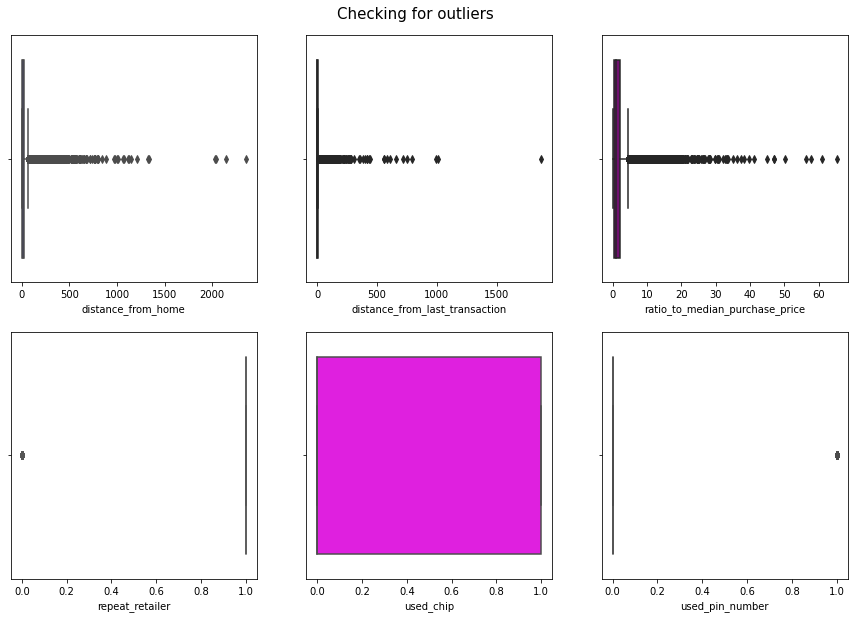

In [ ]:
# Checking for outliers
#
# Defining the columns to check for outliers.
num_cols = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

df_num = df[num_cols]
# Defining the colors to be used in the boxplots
#
colors = ['blue','green','purple','turquoise','magenta','red','fuchsia','black']
# Used a for loop to plot boxplots for each of the selected columns.
#


fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='black')
for ax,data,column,color in zip(axes.flatten(),df,num_cols,colors):
  sns.boxplot(x = df[column], ax=ax, color=color)
  ax.set_facecolor('white')

plt.show()

There are quite a number of outliers in the 'distance_from_home',  'distance_from_last_transaction' & 'ratio_to_median_purchase_price' columns.  We won't drop the outliers because they may be good indicators of fraudulent behavior. 

# Exploratory Data Analysis

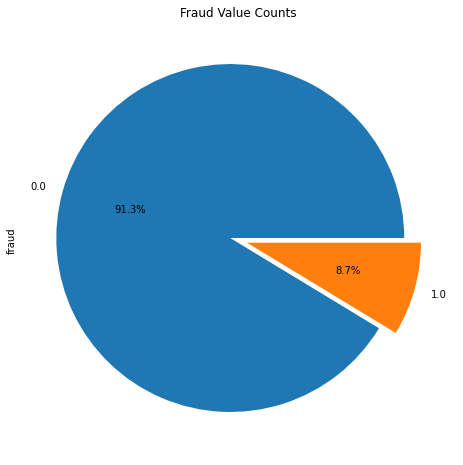

In [ ]:
pied = df.fraud.value_counts()
plt.figure(figsize = (8,8))
plt.title('Fraud Value Counts')
pied.plot.pie(autopct="%.1f%%",explode= [0.05,0.05]);


Fraudulent cases account for 8.7% of the entire database. 



## Univariate models

In [ ]:
# Plotting the univariate summaries and recording our observations
#

def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    out_df.loc[col] = [df_num[col].count(), df_num[col].nunique(), df_num[col].mode().values[0], df_num[col].mean(), df_num[col].min(), 
                         df_num[col].quantile(0.25), df_num[col].median(), df_num[col].quantile(0.75), df_num[col].max(), df_num[col].std(), df_num[col].skew(), df_num[col].kurt()]
  return out_df

uni_stats(df_num)

,Count,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
distance_from_home,27496.0,27496.0,0.031670,27.123694,0.031670,3.885667,10.125329,26.116232,2353.226927,63.018835,11.467822,256.351933
distance_from_last_transaction,27496.0,27496.0,0.000856,5.050688,0.000856,0.305397,1.022600,3.431631,1872.446884,23.659805,32.794174,1856.716049
ratio_to_median_purchase_price,27496.0,27496.0,0.011373,1.807626,0.011373,0.479473,1.005091,2.090165,65.150879,2.666669,6.235433,74.698068
repeat_retailer,27496.0,2.0,1.000000,0.883801,0.000000,1.000000,1.000000,1.000000,1.000000,0.320469,-2.395422,3.738321
used_chip,27496.0,2.0,0.000000,0.349905,0.000000,0.000000,0.000000,1.000000,1.000000,0.476949,0.629441,-1.603921
used_pin_number,27496.0,2.0,0.000000,0.102524,0.000000,0.000000,0.000000,0.000000,1.000000,0.303342,2.620839,4.869153
online_order,27495.0,2.0,1.000000,0.648154,0.000000,0.000000,1.000000,1.000000,1.000000,0.477555,-0.620515,-1.615079


- The 'distance_from_home' column has all of it's values being unique. 'Distance_from_last_transaction' & 'ratio_to_median_purchase_price' columns have 41,243 unique values. The rest of the columns have two uniques values since the values are either 0 or 1.
- The modes for our first three columns are 0.021322, 0.000705 & 0.011373 respectively. The 'repeat_retailer' & 'online_order' have 1 as their most common values indicating that most of the customers are repeat retailers and most orders are online orders. The 'used_chip' & 'used_pin_number'  have 0 as their most common values, showing that most customers didn't use their chips/pin numbers.

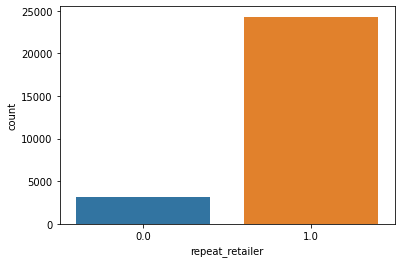

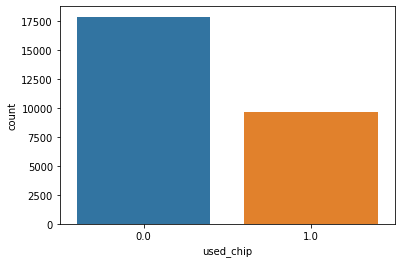

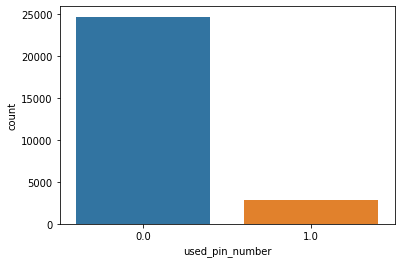

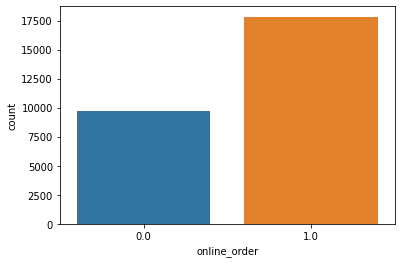

In [ ]:
# Plotting the distribtions of the different columns
df1 = df[['repeat_retailer', 'used_chip','used_pin_number', 'online_order']]
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)

## Bivariate Analysis

In [ ]:
# Check for relationships between the columns 
plt.figure(dpi= 80)
sns.pairplot(df, kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

Error in callback <function flush_figures at 0x7feebb5b44d0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# Check for collinearity in the data. 
corr = df.corr()
corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


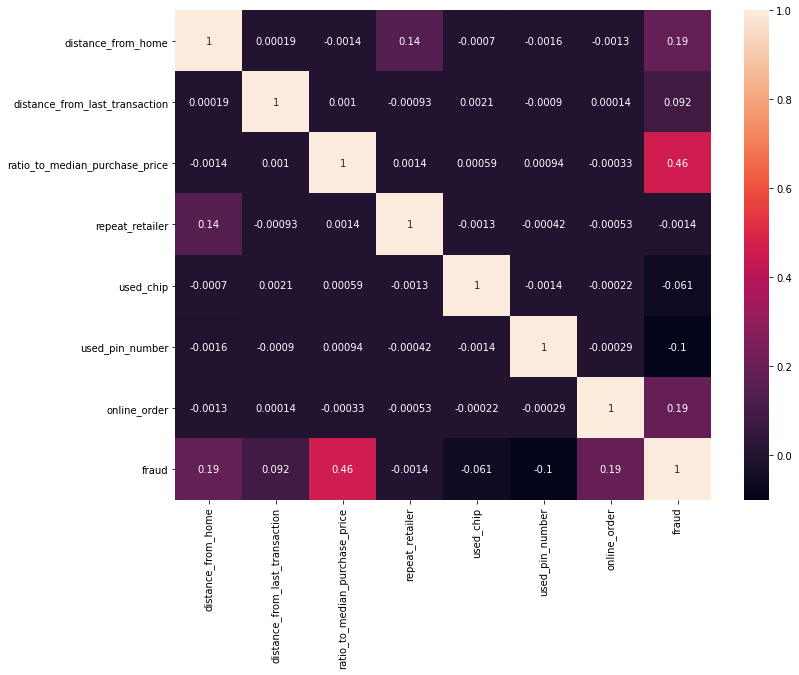

In [ ]:
plt.figure(figsize= (12, 9))
plt.title("Correlation Heat")
sns.heatmap(corr, annot=True)

The higest correlation is O.46: between ratio_to_median_purchase_price and fraud columns. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


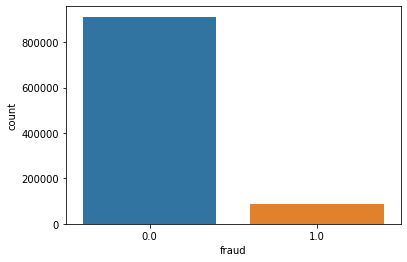

In [ ]:
sns.countplot(df.fraud)

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Modelling 